# Importaciones

In [52]:
# Importación de librerías principales para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st
import holidays


In [53]:
# Cargar los CSVs de ventas y competencia desde la carpeta relativa
ventas_path = "../data/raw/entrenamiento/ventas.csv"
competencia_path = "../data/raw/entrenamiento/competencia.csv"

# Cargar los datos en DataFrames
ventas_df = pd.read_csv(ventas_path)
competencia_df = pd.read_csv(competencia_path)

# Mostrar las primeras filas de cada DataFrame para verificar la carga
display(ventas_df.head())
display(competencia_df.head())

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74


,fecha,producto_id,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,82.96,111.88,97.43
1,2021-10-25,PROD_002,112.56,108.61,115.58
2,2021-10-25,PROD_003,79.79,78.44,80.11
3,2021-10-25,PROD_004,72.60,67.29,74.45
4,2021-10-25,PROD_005,37.71,33.60,33.07


In [54]:
# Informe de calidad de datos para ventas_df
print('--- Tipos de variables ---')
print(ventas_df.dtypes)
print('\n--- Nulos por columna ---')
print(ventas_df.isnull().sum())
print('\n--- Duplicados ---')
print(f'Registros duplicados: {ventas_df.duplicated().sum()}')
print('\n--- Estadísticos descriptivos ---')
print(ventas_df.describe(include='all').transpose())
print('\n--- Valores únicos por columna ---')
print(ventas_df.nunique())

# Informe final estructurado
print('\n===== INFORME FINAL DE CALIDAD DE DATOS =====')
print(f'Total de registros: {len(ventas_df)}')
print(f'Total de columnas: {ventas_df.shape[1]}')
print(f'Registros duplicados: {ventas_df.duplicated().sum()}')
print('Columnas con nulos:')
for col in ventas_df.columns:
    nulos = ventas_df[col].isnull().sum()
    if nulos > 0:
        print(f'  - {col}: {nulos} nulos')
print('Columnas con un solo valor único (posible baja información):')
for col in ventas_df.columns:
    if ventas_df[col].nunique() == 1:
        print(f'  - {col}')
print('===== FIN DEL INFORME =====')

--- Tipos de variables ---
fecha                 object
producto_id           object
nombre                object
categoria             object
subcategoria          object
precio_base            int64
es_estrella             bool
unidades_vendidas      int64
precio_venta         float64
ingresos             float64
dtype: object

--- Nulos por columna ---
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
dtype: int64

--- Duplicados ---
Registros duplicados: 0

--- Estadísticos descriptivos ---
                    count unique                       top  freq        mean  \
fecha                3552    148                2021-10-25    24         NaN   
producto_id          3552     24                  PROD_001   148         NaN   
nombre               3552     24  Nike Air Zoom Pegasus 40   148         NaN   


In [55]:
# Informe de calidad de datos para competencia_df
print('--- Tipos de variables ---')
print(competencia_df.dtypes)
print('\n--- Nulos por columna ---')
print(competencia_df.isnull().sum())
print('\n--- Duplicados ---')
print(f'Registros duplicados: {competencia_df.duplicated().sum()}')
print('\n--- Estadísticos descriptivos ---')
print(competencia_df.describe(include='all').transpose())
print('\n--- Valores únicos por columna ---')
print(competencia_df.nunique())

# Informe final estructurado
print('\n===== INFORME FINAL DE CALIDAD DE DATOS COMPETENCIA =====')
print(f'Total de registros: {len(competencia_df)}')
print(f'Total de columnas: {competencia_df.shape[1]}')
print(f'Registros duplicados: {competencia_df.duplicated().sum()}')
print('Columnas con nulos:')
for col in competencia_df.columns:
    nulos = competencia_df[col].isnull().sum()
    if nulos > 0:
        print(f'  - {col}: {nulos} nulos')
print('Columnas con un solo valor único (posible baja información):')
for col in competencia_df.columns:
    if competencia_df[col].nunique() == 1:
        print(f'  - {col}')
print('===== FIN DEL INFORME =====')

--- Tipos de variables ---
fecha            object
producto_id      object
Amazon          float64
Decathlon       float64
Deporvillage    float64
dtype: object

--- Nulos por columna ---
fecha           0
producto_id     0
Amazon          0
Decathlon       0
Deporvillage    0
dtype: int64

--- Duplicados ---
Registros duplicados: 0

--- Estadísticos descriptivos ---
               count unique         top freq        mean         std    min  \
fecha           3552    148  2021-10-25   24         NaN         NaN    NaN   
producto_id     3552     24    PROD_001  148         NaN         NaN    NaN   
Amazon        3552.0    NaN         NaN  NaN  118.623407  156.095628  16.85   
Decathlon     3552.0    NaN         NaN  NaN  111.412182  148.508132  15.45   
Deporvillage  3552.0    NaN         NaN  NaN  118.894628  160.216448  16.77   

                  25%     50%       75%       max  
fecha             NaN     NaN       NaN       NaN  
producto_id       NaN     NaN       NaN       NaN  

In [56]:
# Convertir columna 'fecha' a datetime en ambos dataframes
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha'], errors='coerce')
competencia_df['fecha'] = pd.to_datetime(competencia_df['fecha'], errors='coerce')
print('Conversiones realizadas. Tipos de datos actualizados:')
print('ventas_df:', ventas_df.dtypes['fecha'])
print('competencia_df:', competencia_df.dtypes['fecha'])

# Análisis temporal básico: rango de fechas y frecuencia
print('\n--- Análisis temporal ventas_df ---')
print('Rango de fechas:', ventas_df['fecha'].min(), 'a', ventas_df['fecha'].max())
print('Total de días únicos:', ventas_df['fecha'].nunique())
print('Primeras fechas:', ventas_df['fecha'].sort_values().unique()[:5])
print('Últimas fechas:', ventas_df['fecha'].sort_values().unique()[-5:])

print('\n--- Análisis temporal competencia_df ---')
print('Rango de fechas:', competencia_df['fecha'].min(), 'a', competencia_df['fecha'].max())
print('Total de días únicos:', competencia_df['fecha'].nunique())
print('Primeras fechas:', competencia_df['fecha'].sort_values().unique()[:5])
print('Últimas fechas:', competencia_df['fecha'].sort_values().unique()[-5:])

Conversiones realizadas. Tipos de datos actualizados:
ventas_df: datetime64[ns]
competencia_df: datetime64[ns]

--- Análisis temporal ventas_df ---
Rango de fechas: 2021-10-25 00:00:00 a 2024-11-30 00:00:00
Total de días únicos: 148
Primeras fechas: <DatetimeArray>
['2021-10-25 00:00:00', '2021-10-26 00:00:00', '2021-10-27 00:00:00',
 '2021-10-28 00:00:00', '2021-10-29 00:00:00']
Length: 5, dtype: datetime64[ns]
Últimas fechas: <DatetimeArray>
['2024-11-26 00:00:00', '2024-11-27 00:00:00', '2024-11-28 00:00:00',
 '2024-11-29 00:00:00', '2024-11-30 00:00:00']
Length: 5, dtype: datetime64[ns]

--- Análisis temporal competencia_df ---
Rango de fechas: 2021-10-25 00:00:00 a 2024-11-30 00:00:00
Total de días únicos: 148
Primeras fechas: <DatetimeArray>
['2021-10-25 00:00:00', '2021-10-26 00:00:00', '2021-10-27 00:00:00',
 '2021-10-28 00:00:00', '2021-10-29 00:00:00']
Length: 5, dtype: datetime64[ns]
Últimas fechas: <DatetimeArray>
['2024-11-26 00:00:00', '2024-11-27 00:00:00', '2024-11-28 0

In [57]:
# Integrar ventas_df y competencia_df en un nuevo dataframe df usando fecha y producto_id como claves
df = pd.merge(ventas_df, competencia_df, on=['fecha', 'producto_id'], how='inner')
print('Shape del nuevo dataframe df:', df.shape)
print('Primeras filas del dataframe integrado:')
display(df.head())

Shape del nuevo dataframe df: (3552, 13)
Primeras filas del dataframe integrado:


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


## Análisis exploratorio general del dataframe df
A continuación se realiza un análisis exploratorio completo del dataframe integrado `df`, que contiene información de ventas y competencia. Se revisan estadísticas descriptivas, valores nulos, duplicados, y se visualizan las principales variables numéricas y categóricas.

In [58]:
# Estadísticas descriptivas y revisión de nulos/duplicados en df
print('--- Tipos de variables ---')
print(df.dtypes)
print('\n--- Nulos por columna ---')
print(df.isnull().sum())
print('\n--- Duplicados ---')
print(f'Registros duplicados: {df.duplicated().sum()}')
print('\n--- Estadísticos descriptivos ---')
print(df.describe(include='all').transpose())
print('\n--- Valores únicos por columna ---')
print(df.nunique())
print('\n===== INFORME FINAL DE CALIDAD DE DATOS DF =====')
print(f'Total de registros: {len(df)}')
print(f'Total de columnas: {df.shape[1]}')
print(f'Registros duplicados: {df.duplicated().sum()}')
print('Columnas con nulos:')
for col in df.columns:
    nulos = df[col].isnull().sum()
    if nulos > 0:
        print(f'  - {col}: {nulos} nulos')
print('Columnas con un solo valor único (posible baja información):')
for col in df.columns:
    if df[col].nunique() == 1:
        print(f'  - {col}')
print('===== FIN DEL INFORME =====')

--- Tipos de variables ---
fecha                datetime64[ns]
producto_id                  object
nombre                       object
categoria                    object
subcategoria                 object
precio_base                   int64
es_estrella                    bool
unidades_vendidas             int64
precio_venta                float64
ingresos                    float64
Amazon                      float64
Decathlon                   float64
Deporvillage                float64
dtype: object

--- Nulos por columna ---
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
Amazon               0
Decathlon            0
Deporvillage         0
dtype: int64

--- Duplicados ---
Registros duplicados: 0

--- Estadísticos descriptivos ---
                    count unique                       top  freq  \
fecha

## Suma de unidades vendidas por año y Black Friday
Se muestra la evolución anual de las unidades vendidas, marcando los días de Black Friday en cada año.

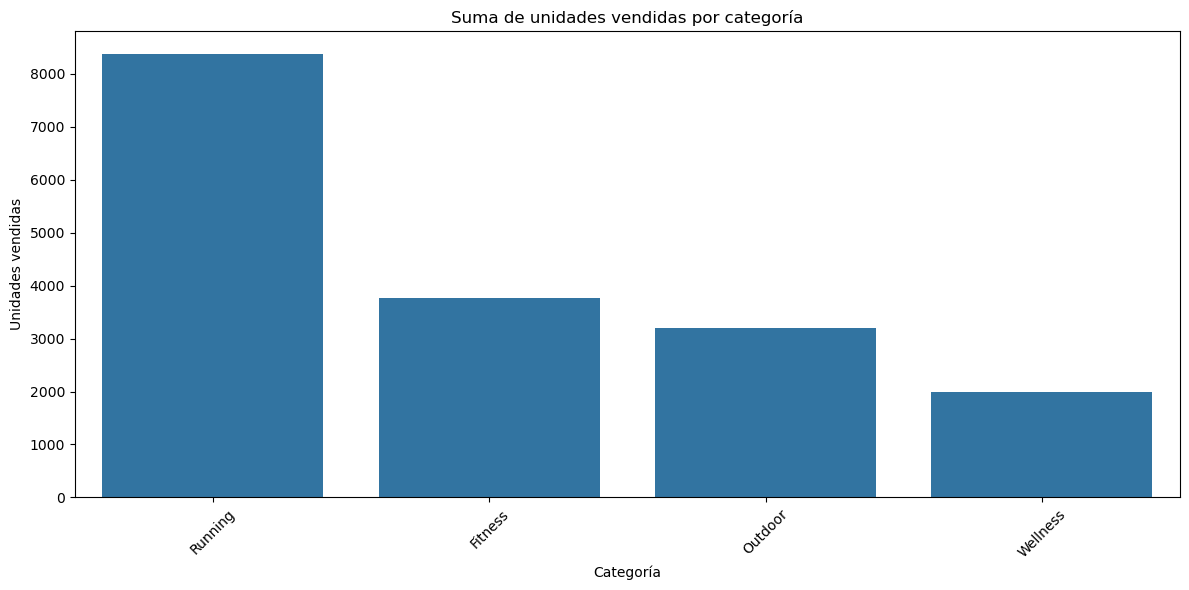

In [59]:
# Gráfico suma de unidades vendidas por categoría
plt.figure(figsize=(12,6))
sns.barplot(x=df['categoria'], y=df['unidades_vendidas'], estimator=sum, errorbar=None)
plt.title('Suma de unidades vendidas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Suma de unidades vendidas por día de la semana
Visualización de la suma de unidades vendidas agrupadas por cada día de la semana.

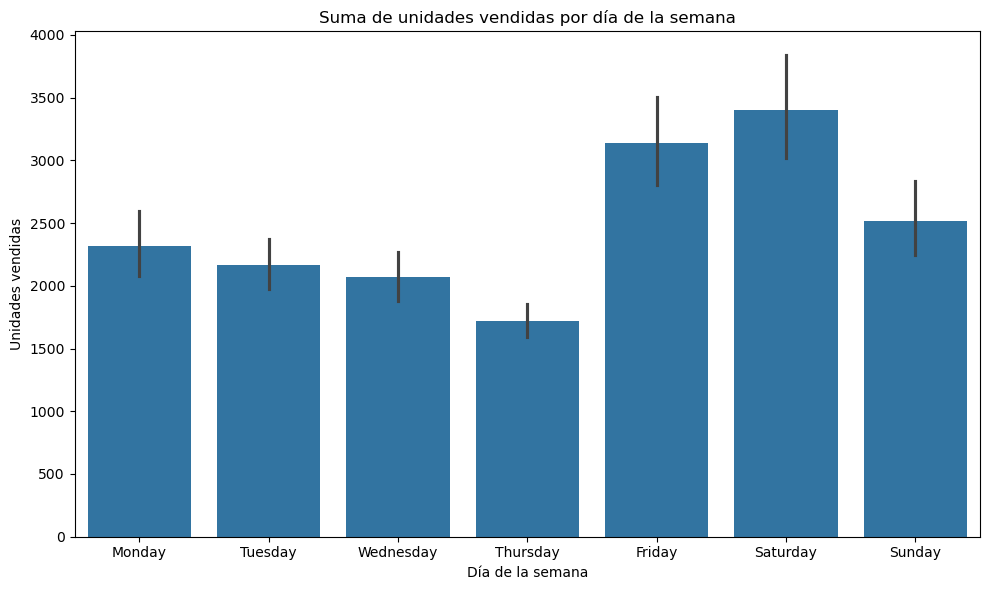

In [60]:
# Gráfico suma de unidades vendidas por día de la semana
df['dia_semana'] = df['fecha'].dt.day_name()
plt.figure(figsize=(10,6))
sns.barplot(x=df['dia_semana'], y=df['unidades_vendidas'], estimator=sum, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Suma de unidades vendidas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Unidades vendidas')
plt.tight_layout()
plt.show()

## Suma de unidades vendidas por categoría
Visualización de la suma de unidades vendidas agrupadas por categoría de producto.

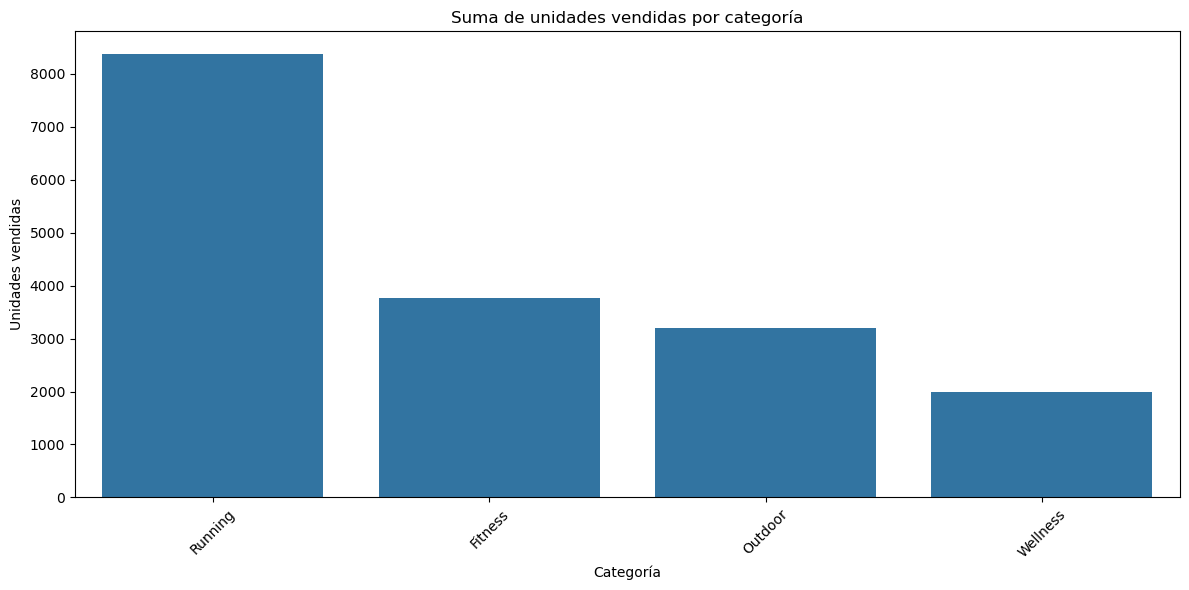

In [61]:
# Gráfico suma de unidades vendidas por categoría
plt.figure(figsize=(12,6))
sns.barplot(x=df['categoria'], y=df['unidades_vendidas'], estimator=sum, errorbar=None)
plt.title('Suma de unidades vendidas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Suma de unidades vendidas por subcategoría
Visualización de la suma de unidades vendidas agrupadas por subcategoría de producto.

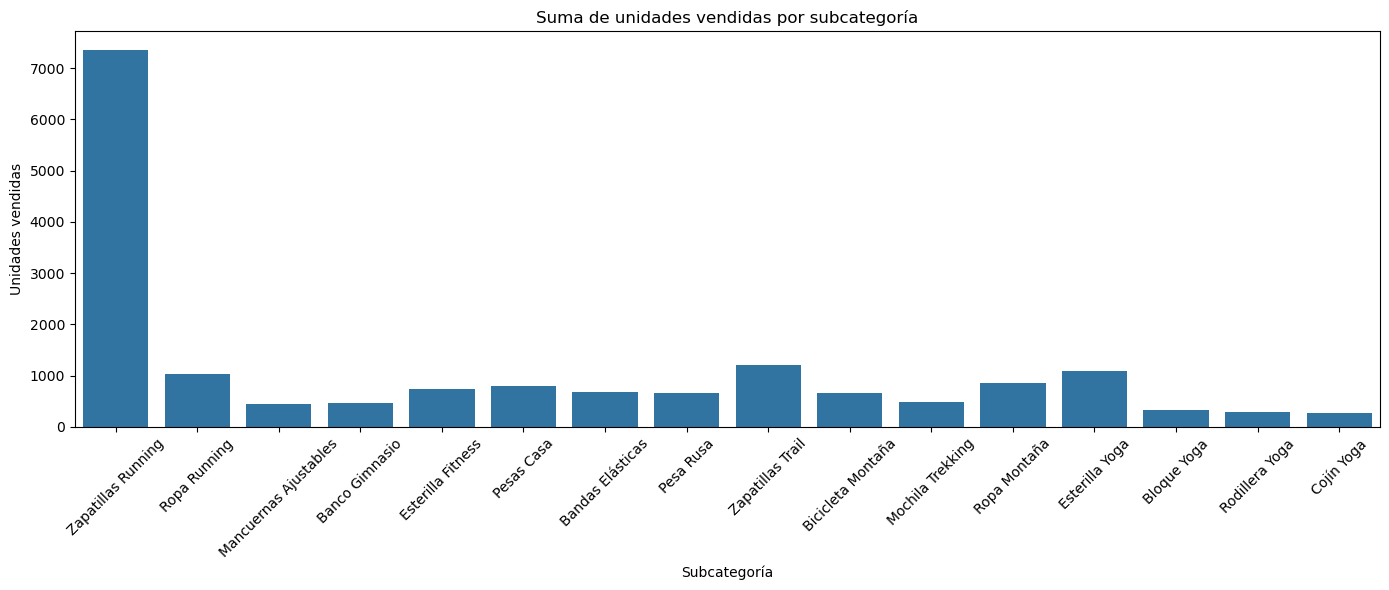

In [62]:
# Gráfico suma de unidades vendidas por subcategoría
plt.figure(figsize=(14,6))
sns.barplot(x=df['subcategoria'], y=df['unidades_vendidas'], estimator=sum, errorbar=None)
plt.title('Suma de unidades vendidas por subcategoría')
plt.xlabel('Subcategoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top productos por unidades vendidas
Visualización de los productos con mayor volumen de ventas.

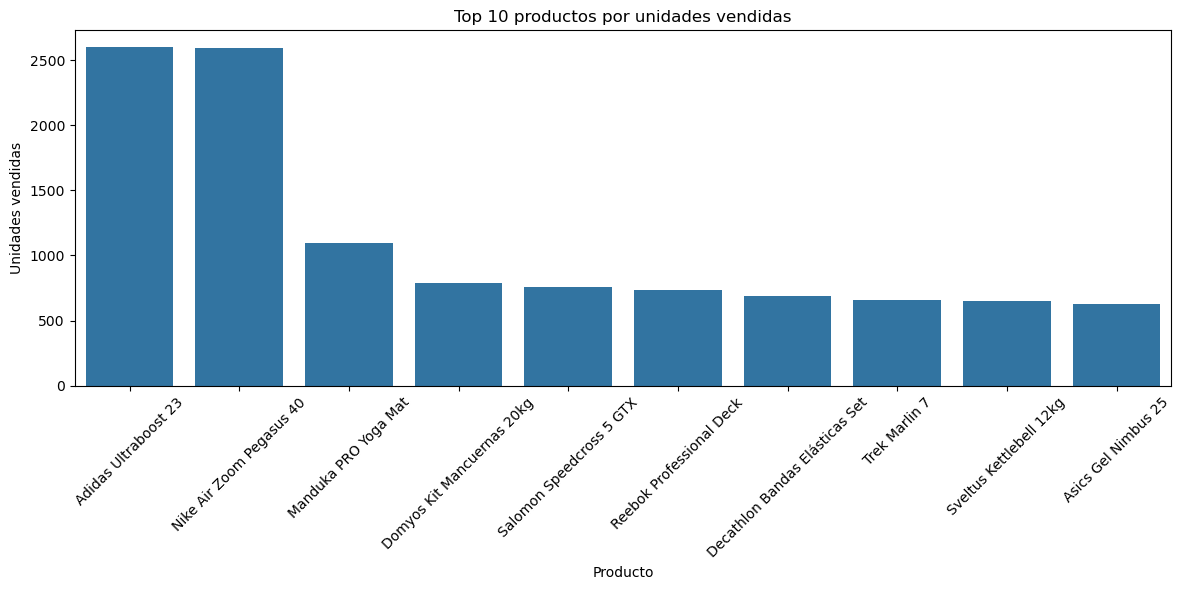

In [63]:
# Gráfico top productos por unidades vendidas
top_n = 10
top_productos = df.groupby('nombre')['unidades_vendidas'].sum().sort_values(ascending=False).head(top_n)
plt.figure(figsize=(12,6))
sns.barplot(x=top_productos.index, y=top_productos.values)
plt.title(f'Top {top_n} productos por unidades vendidas')
plt.xlabel('Producto')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Densidad de distribución de precios propios y Amazon
Comparativa de la densidad de los precios de venta propios frente a los precios de Amazon como referencia de la competencia.

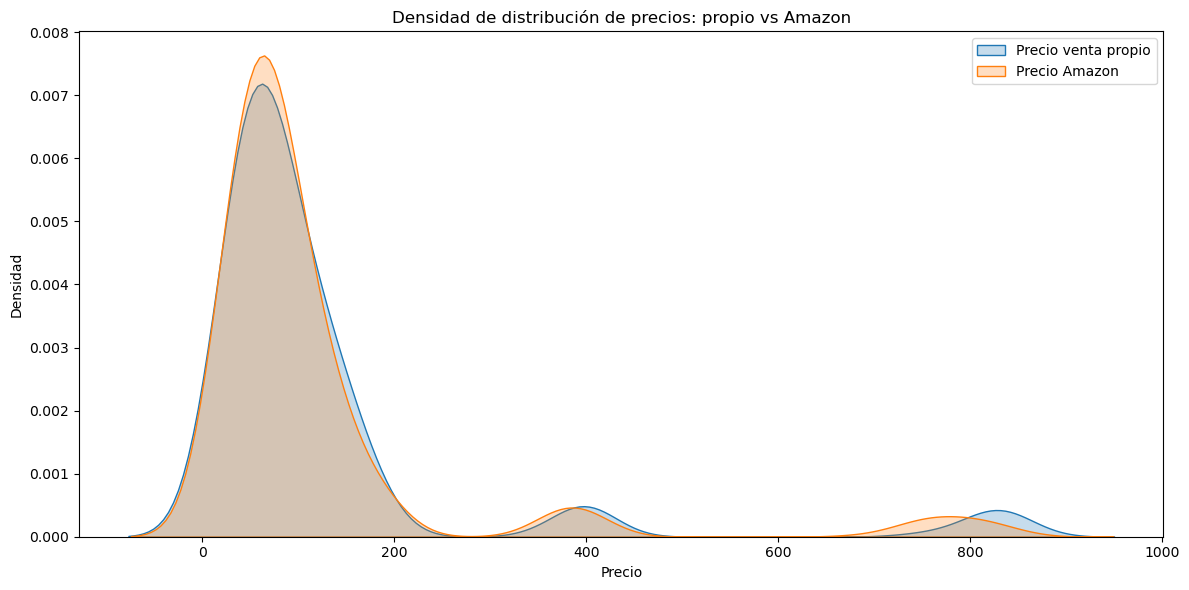

In [64]:
# Gráfico de densidad de precios propios vs Amazon
plt.figure(figsize=(12,6))
sns.kdeplot(df['precio_venta'], label='Precio venta propio', fill=True)
sns.kdeplot(df['Amazon'], label='Precio Amazon', fill=True)
plt.title('Densidad de distribución de precios: propio vs Amazon')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

## Creación de variables temporales y de calendario
Se generan nuevas variables temporales y de calendario en el dataframe `df` utilizando la librería `holidays` para Ecuador y lógica adicional para identificar eventos relevantes como Black Friday y Cyber Monday.

In [65]:
# Variables temporales y de calendario usando holidays para Ecuador
import holidays
# Variables básicas
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia_mes'] = df['fecha'].dt.day
df['dia_semana'] = df['fecha'].dt.dayofweek # 0=Lunes, 6=Domingo
df['nombre_dia_semana'] = df['fecha'].dt.day_name()
df['es_fin_de_semana'] = df['dia_semana'].isin([5,6])
# Festivos en Ecuador
festivos_ecuador = holidays.country_holidays('EC', years=df['año'].unique())
df['es_festivo'] = df['fecha'].isin(festivos_ecuador)
df['nombre_festivo'] = df['fecha'].map(festivos_ecuador)
# Black Friday: último viernes de noviembre
def es_black_friday(fecha):
    if fecha.month == 11 and fecha.weekday() == 4:
        # Viernes de noviembre
        ult_viernes = max([d for d in pd.date_range(start=f'{fecha.year}-11-01', end=f'{fecha.year}-11-30') if d.weekday() == 4])
        return fecha == ult_viernes
    return False
df['es_black_friday'] = df['fecha'].apply(es_black_friday)
df['es_cyber_monday'] = df['fecha'].apply(lambda x: x.month == 11 and x.weekday() == 0 and 27 <= x.day <= 30) # Lunes después de Black Friday
df['semana_año'] = df['fecha'].dt.isocalendar().week
df['trimestre'] = df['fecha'].dt.quarter
df['inicio_mes'] = df['dia_mes'] <= 7
df['fin_mes'] = df['dia_mes'] >= (df['fecha'] + pd.offsets.MonthEnd(0)).dt.day - 6
df['es_primer_dia_mes'] = df['dia_mes'] == 1
df['es_ultimo_dia_mes'] = df['dia_mes'] == (df['fecha'] + pd.offsets.MonthEnd(0)).dt.day
df['es_dia_laborable'] = (~df['es_fin_de_semana']) & (~df['es_festivo'])
print('Variables temporales y de calendario creadas:')
print(df[['fecha','año','mes','dia_mes','nombre_dia_semana','es_fin_de_semana','es_festivo','nombre_festivo','es_black_friday','es_cyber_monday','semana_año','trimestre','inicio_mes','fin_mes','es_primer_dia_mes','es_ultimo_dia_mes','es_dia_laborable']].head())

Variables temporales y de calendario creadas:
       fecha   año  mes  dia_mes nombre_dia_semana  es_fin_de_semana  \
0 2021-10-25  2021   10       25            Monday             False   
1 2021-10-25  2021   10       25            Monday             False   
2 2021-10-25  2021   10       25            Monday             False   
3 2021-10-25  2021   10       25            Monday             False   
4 2021-10-25  2021   10       25            Monday             False   

   es_festivo nombre_festivo  es_black_friday  es_cyber_monday  semana_año  \
0       False            NaN            False            False          43   
1       False            NaN            False            False          43   
2       False            NaN            False            False          43   
3       False            NaN            False            False          43   
4       False            NaN            False            False          43   

   trimestre  inicio_mes  fin_mes  es_primer_dia_mes

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_6708\3146962818.py:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['es_festivo'] = df['fecha'].isin(festivos_ecuador)


## Creación de variables de lags y medias móviles
Se generan los lags de unidades vendidas (de 1 a 7 días) y la media móvil de 7 días, calculando cada año por separado para evitar mezclas entre años. Se eliminan los registros con nulos en las nuevas variables.

In [66]:
df.shape
#la cree antes de crear los lags df.shape daba (3552, 31) (registros, columnas)

(3552, 30)

In [67]:
# Crear lags y media móvil de 7 días por año
df = df.sort_values(['producto_id', 'fecha'])
for lag in range(1, 8):
    df[f'unidades_vendidas_lag{lag}'] = df.groupby(['producto_id', 'año'])['unidades_vendidas'].shift(lag)
df['unidades_vendidas_mm7'] = df.groupby(['producto_id', 'año'])['unidades_vendidas'].transform(lambda x: x.rolling(window=7, min_periods=7).mean())
# Eliminar registros con nulos en alguna de las nuevas variables
vars_nuevas = [f'unidades_vendidas_lag{lag}' for lag in range(1,8)] + ['unidades_vendidas_mm7']
df = df.dropna(subset=vars_nuevas)
print('Variables de lags y media móvil creadas. Primeras filas:')
print(df[['fecha','producto_id','unidades_vendidas'] + vars_nuevas].head())

Variables de lags y media móvil creadas. Primeras filas:
         fecha producto_id  unidades_vendidas  unidades_vendidas_lag1  \
168 2021-11-01    PROD_001                  7                     9.0   
192 2021-11-02    PROD_001                 10                     7.0   
216 2021-11-03    PROD_001                 11                    10.0   
240 2021-11-04    PROD_001                 12                    11.0   
264 2021-11-05    PROD_001                 10                    12.0   

     unidades_vendidas_lag2  unidades_vendidas_lag3  unidades_vendidas_lag4  \
168                    12.0                    12.0                     7.0   
192                     9.0                    12.0                    12.0   
216                     7.0                     9.0                    12.0   
240                    10.0                     7.0                     9.0   
264                    11.0                    10.0                     7.0   

     unidades_vendidas_lag5  

In [68]:
df.shape 
#antes de crear los lags df.shape da (3552, 31) (registros, columnas)

(2880, 38)

In [69]:
# Variable descuento ((porcentaje precio base - precio venta/ precio base))*100
df['descuento_porcentaje'] = ((df['precio_venta'] - df['precio_base']) / df['precio_base']) * 100
print('Primeras filas con descuento porcentaje:')
print(df[['fecha','producto_id','precio_base','precio_venta','descuento_porcentaje']].head())

Primeras filas con descuento porcentaje:
         fecha producto_id  precio_base  precio_venta  descuento_porcentaje
168 2021-11-01    PROD_001          115        115.07              0.060870
192 2021-11-02    PROD_001          115        116.10              0.956522
216 2021-11-03    PROD_001          115        114.58             -0.365217
240 2021-11-04    PROD_001          115        112.23             -2.408696
264 2021-11-05    PROD_001          115        113.81             -1.034783


In [70]:
# Crear variable precio_competencia como promedio de Amazon, Decathlon y Deporvillage
df['precio_competencia'] = df[['Amazon', 'Decathlon', 'Deporvillage']].mean(axis=1)
# Crear variable ratio_precio: nuestro precio entre el precio promedio de la competencia
df['ratio_precio'] = df['precio_venta'] / df['precio_competencia']
# Eliminar variables individuales de competidores
df = df.drop(columns=['Amazon', 'Decathlon', 'Deporvillage'])
print('Primeras filas con precio_competencia y ratio_precio:')
print(df[['fecha','producto_id','precio_venta','precio_competencia','ratio_precio']].head())

Primeras filas con precio_competencia y ratio_precio:
         fecha producto_id  precio_venta  precio_competencia  ratio_precio
168 2021-11-01    PROD_001        115.07           95.353333      1.206775
192 2021-11-02    PROD_001        116.10           96.153333      1.207446
216 2021-11-03    PROD_001        114.58           95.240000      1.203066
240 2021-11-04    PROD_001        112.23           96.590000      1.161922
264 2021-11-05    PROD_001        113.81           96.170000      1.183425


In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2880 entries, 168 to 3551
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   2880 non-null   datetime64[ns]
 1   producto_id             2880 non-null   object        
 2   nombre                  2880 non-null   object        
 3   categoria               2880 non-null   object        
 4   subcategoria            2880 non-null   object        
 5   precio_base             2880 non-null   int64         
 6   es_estrella             2880 non-null   bool          
 7   unidades_vendidas       2880 non-null   int64         
 8   precio_venta            2880 non-null   float64       
 9   ingresos                2880 non-null   float64       
 10  dia_semana              2880 non-null   int32         
 11  año                     2880 non-null   int32         
 12  mes                     2880 non-null   int32      

In [75]:
# Crear copias de las variables con sufijo _h
df['nombre_h'] = df['nombre']
df['categoria_h'] = df['categoria']
df['subcategoria_h'] = df['subcategoria']
# One hot encoding sobre las variables _h
df = pd.get_dummies(df, columns=['nombre_h', 'categoria_h', 'subcategoria_h'], drop_first=False)
print('Variables one-hot creadas. Columnas actuales:')
print(df.columns)
df.head()

Variables one-hot creadas. Columnas actuales:
Index(['fecha', 'producto_id', 'nombre', 'categoria', 'subcategoria',
       'precio_base', 'es_estrella', 'unidades_vendidas', 'precio_venta',
       'ingresos',
       ...
       'subcategoria_h_Esterilla Yoga', 'subcategoria_h_Mancuernas Ajustables',
       'subcategoria_h_Mochila Trekking', 'subcategoria_h_Pesa Rusa',
       'subcategoria_h_Pesas Casa', 'subcategoria_h_Rodillera Yoga',
       'subcategoria_h_Ropa Montaña', 'subcategoria_h_Ropa Running',
       'subcategoria_h_Zapatillas Running', 'subcategoria_h_Zapatillas Trail'],
      dtype='object', length=126)


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,subcategoria_h_Esterilla Yoga,subcategoria_h_Mancuernas Ajustables,subcategoria_h_Mochila Trekking,subcategoria_h_Pesa Rusa,subcategoria_h_Pesas Casa,subcategoria_h_Rodillera Yoga,subcategoria_h_Ropa Montaña,subcategoria_h_Ropa Running,subcategoria_h_Zapatillas Running,subcategoria_h_Zapatillas Trail
168,2021-11-01,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,7,115.07,805.49,...,False,False,False,False,False,False,False,False,True,False
192,2021-11-02,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,10,116.10,1161.00,...,False,False,False,False,False,False,False,False,True,False
216,2021-11-03,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,11,114.58,1260.38,...,False,False,False,False,False,False,False,False,True,False
240,2021-11-04,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,12,112.23,1346.76,...,False,False,False,False,False,False,False,False,True,False
264,2021-11-05,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,10,113.81,1138.10,...,False,False,False,False,False,False,False,False,True,False


In [77]:
# Guardar el dataframe df en la carpeta data/processed
df.to_csv('../data/processed/df.csv', index=False)
print('DataFrame guardado en data/processed/df.csv')

DataFrame guardado en data/processed/df.csv


In [88]:
# Dividir df en train_df (2021-2023) y validation_df (2024)
train_df = df[df['año'].isin([2021, 2022, 2023])].copy()
validation_df = df[df['año'] == 2024].copy()
print(f'Registros en train_df: {len(train_df)}')
print(f'Registros en validation_df: {len(validation_df)}')

Registros en train_df: 2160
Registros en validation_df: 720


## Entrenamiento y evaluación de HistGradientBoostingRegressor

Entrenamos el modelo con parámetros conservadores para evitar overfitting y comparamos contra un baseline naive (media). Se reportan las métricas MAE y RMSE.

In [97]:
# 🤖 Entrenamiento y evaluación de HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Definir target y predictoras
excluir = ['fecha', 'ingresos']
predictoras = [col for col in train_df.select_dtypes(exclude=['object']).columns if col not in excluir and col != 'unidades_vendidas']
target = 'unidades_vendidas'

X_train = train_df[predictoras]
y_train = train_df[target]
X_val = validation_df[predictoras]
y_val = validation_df[target]

# Parámetros conservadores
model = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=400,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_val)

# Baseline naive (media)
y_pred_naive = np.full_like(y_val, y_train.mean(), dtype=np.float64)

# Métricas
mae_model = mean_absolute_error(y_val, y_pred)
rmse_model = np.sqrt(np.square(y_val - y_pred).mean())
mae_naive = mean_absolute_error(y_val, y_pred_naive)
rmse_naive = np.sqrt(np.square(y_val - y_pred_naive).mean())

print('--- Métricas HistGradientBoostingRegressor ---')
print(f'MAE: {mae_model:.2f}')
print(f'RMSE: {rmse_model:.2f}')
print('\n--- Métricas Baseline Naive (media) ---')
print(f'MAE: {mae_naive:.2f}')
print(f'RMSE: {rmse_naive:.2f}')

--- Métricas HistGradientBoostingRegressor ---
MAE: 0.76
RMSE: 1.47

--- Métricas Baseline Naive (media) ---
MAE: 3.67
RMSE: 6.69


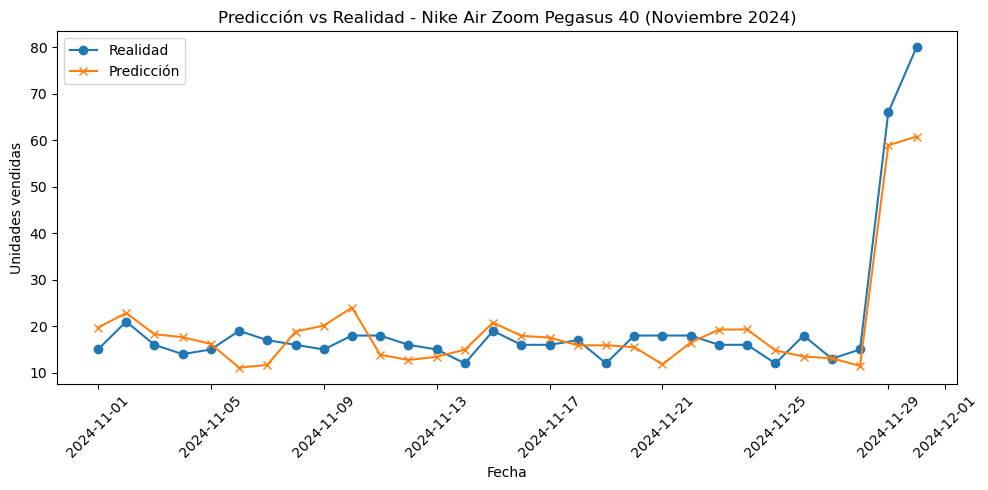

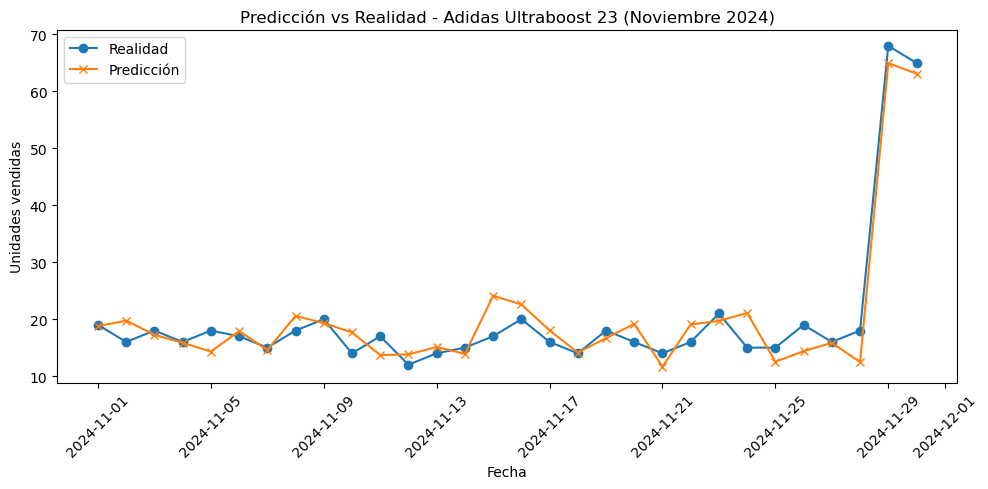

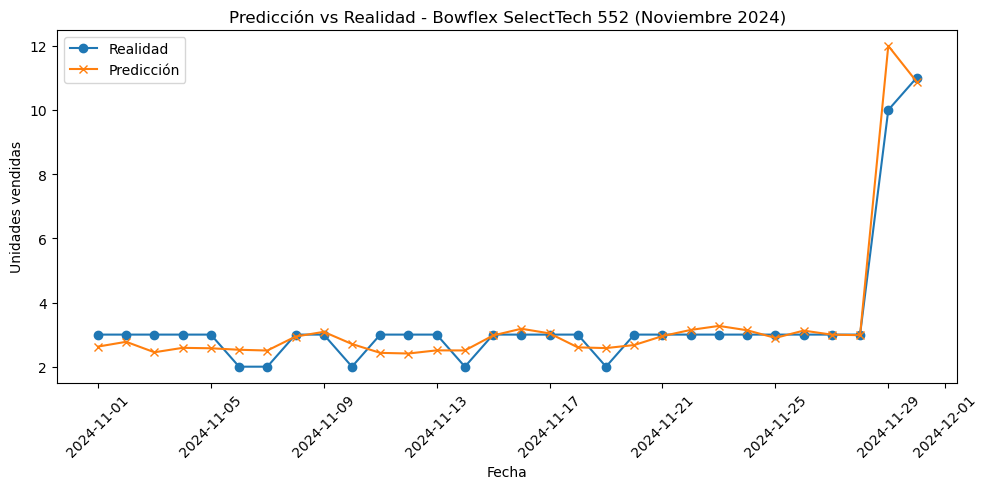

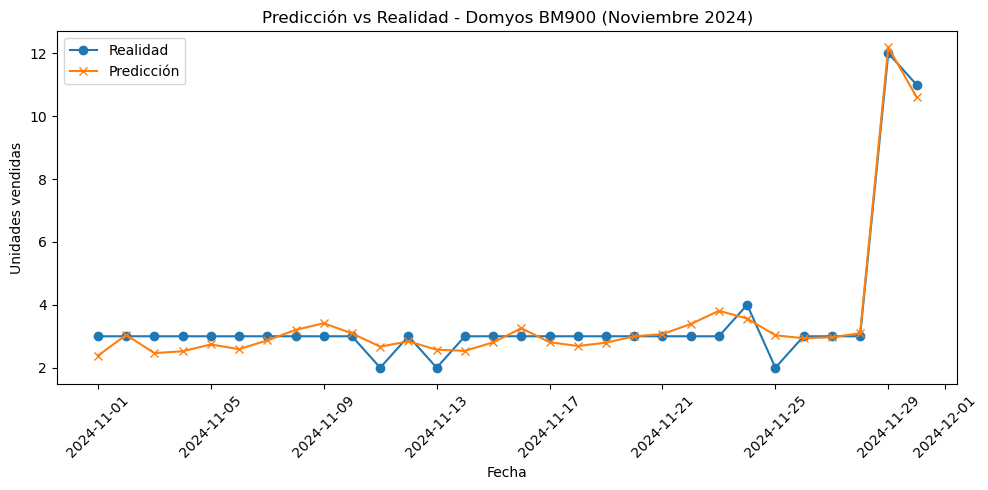

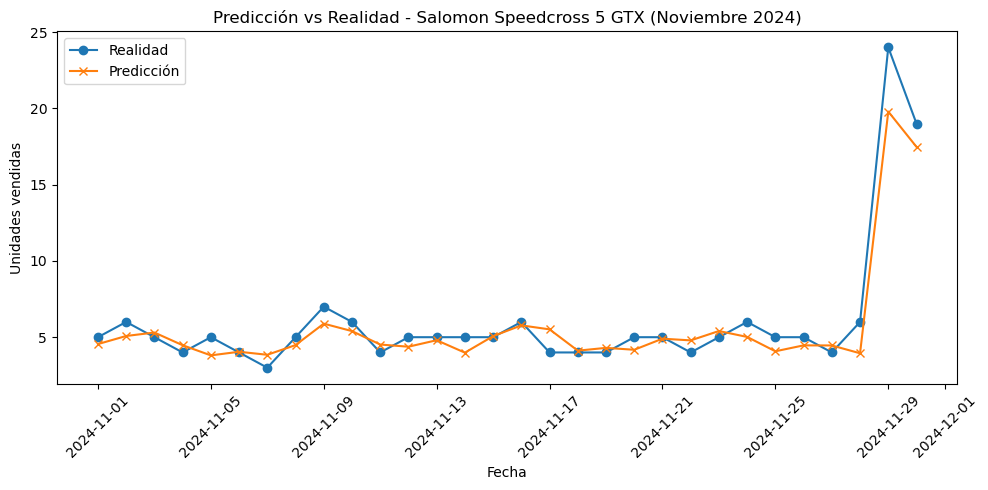

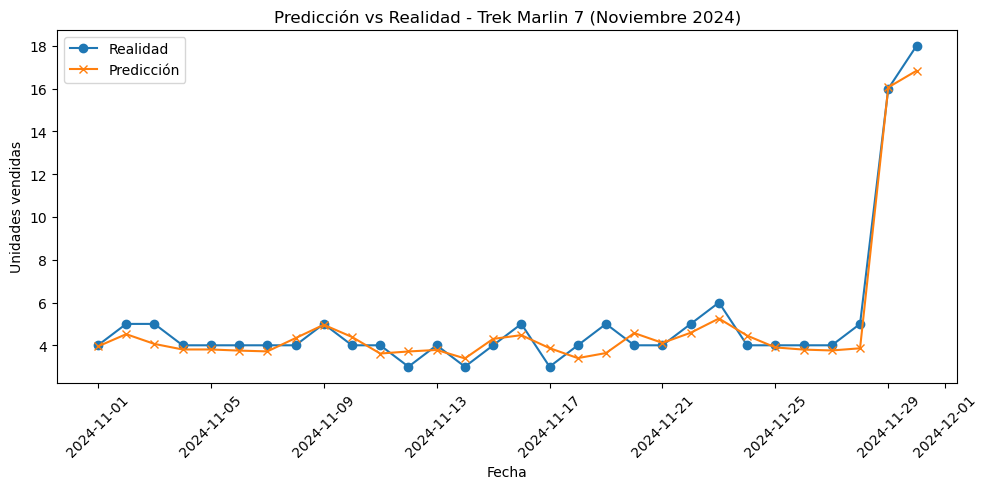

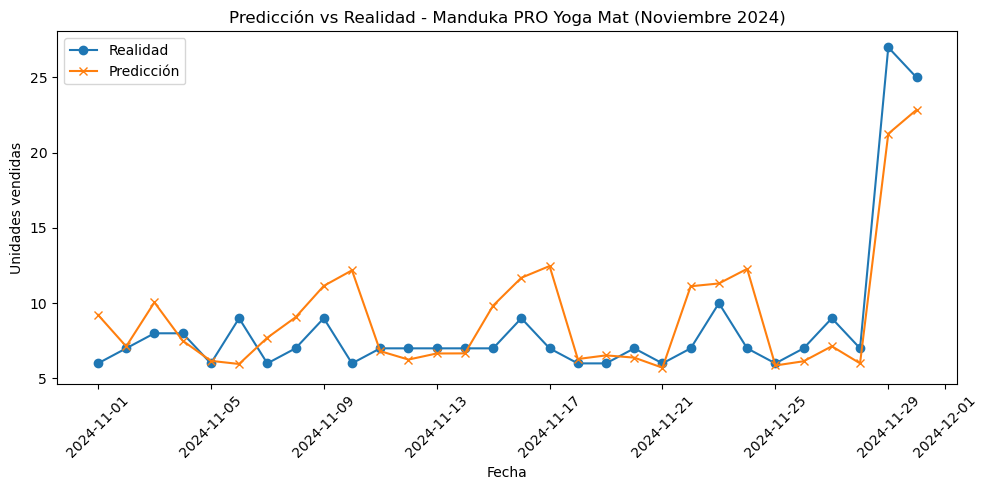

In [98]:
# 🤖 Predicción y visualización para productos estrella en noviembre 2024
import matplotlib.pyplot as plt

# Filtrar noviembre 2024 y productos estrella
nov_2024 = validation_df[(validation_df['año'] == 2024) & (validation_df['mes'] == 11) & (validation_df['es_estrella'])]
productos_estrella = nov_2024['nombre'].unique()[:7]

for producto in productos_estrella:
    df_prod = nov_2024[nov_2024['nombre'] == producto].copy()
    X_prod = df_prod[predictoras]
    y_real = df_prod['unidades_vendidas']
    y_pred = model.predict(X_prod)
    plt.figure(figsize=(10,5))
    plt.plot(df_prod['fecha'], y_real, label='Realidad', marker='o')
    plt.plot(df_prod['fecha'], y_pred, label='Predicción', marker='x')
    plt.title(f'Predicción vs Realidad - {producto} (Noviembre 2024)')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades vendidas')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [99]:
# 🤖 Calcular MAE para cada producto estrella en noviembre 2024
from sklearn.metrics import mean_absolute_error

mae_por_producto = []
for producto in productos_estrella:
    df_prod = nov_2024[nov_2024['nombre'] == producto].copy()
    X_prod = df_prod[predictoras]
    y_real = df_prod['unidades_vendidas']
    y_pred = model.predict(X_prod)
    mae = mean_absolute_error(y_real, y_pred)
    mae_por_producto.append({'producto': producto, 'MAE': mae})

mae_df = pd.DataFrame(mae_por_producto)
print('MAE por producto estrella en noviembre 2024:')
display(mae_df)

MAE por producto estrella en noviembre 2024:


,producto,MAE
0,Nike Air Zoom Pegasus 40,3.905867
1,Adidas Ultraboost 23,2.367070
2,Bowflex SelectTech 552,0.351189
3,Domyos BM900,0.323253
4,Salomon Speedcross 5 GTX,0.794945
5,Trek Marlin 7,0.457227
6,Manduka PRO Yoga Mat,1.933746


Errores por producto y período:


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_6708\3768167624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_2024['dia_mes'] = nov_2024['dia_mes'].astype(int)


,producto,periodo,MAE,RMSE
0,Nike Air Zoom Pegasus 40,1-10,4.090552,4.549419
1,Nike Air Zoom Pegasus 40,11-20,2.474062,2.665915
2,Nike Air Zoom Pegasus 40,21-31,5.152988,7.223525
3,Adidas Ultraboost 23,1-10,1.680988,2.233429
4,Adidas Ultraboost 23,11-20,2.370488,2.998948
5,Adidas Ultraboost 23,21-31,3.049735,3.529172
6,Bowflex SelectTech 552,1-10,0.387337,0.434498
7,Bowflex SelectTech 552,11-20,0.370479,0.424637
8,Bowflex SelectTech 552,21-31,0.295750,0.644071
9,Domyos BM900,1-10,0.318171,0.370155


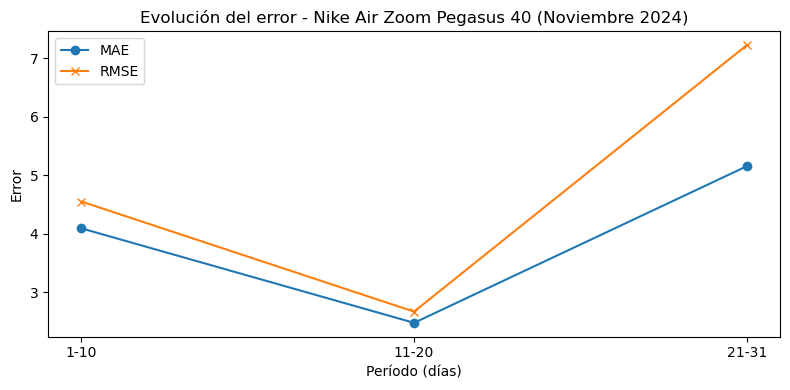

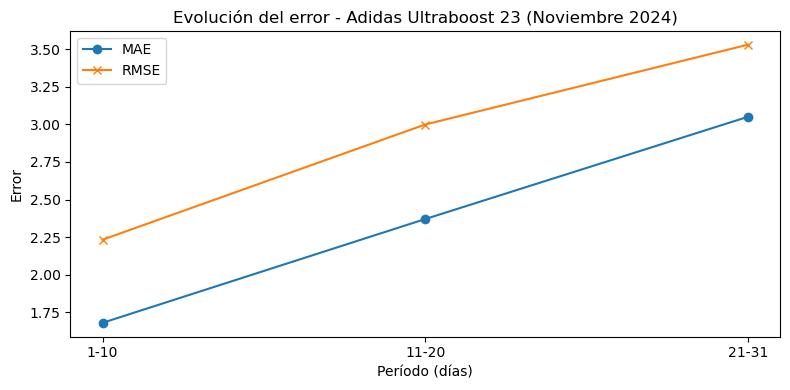

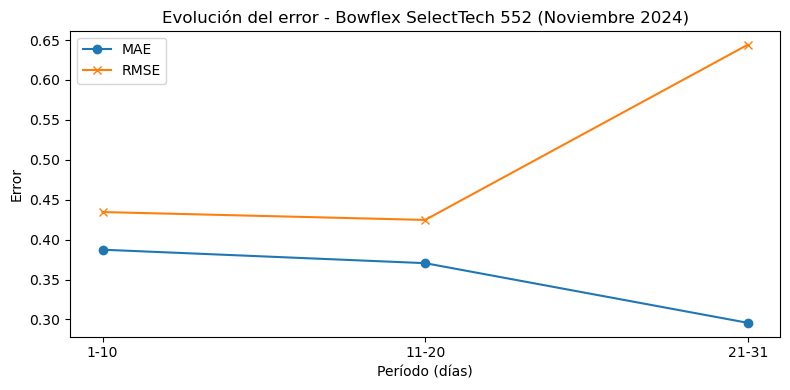

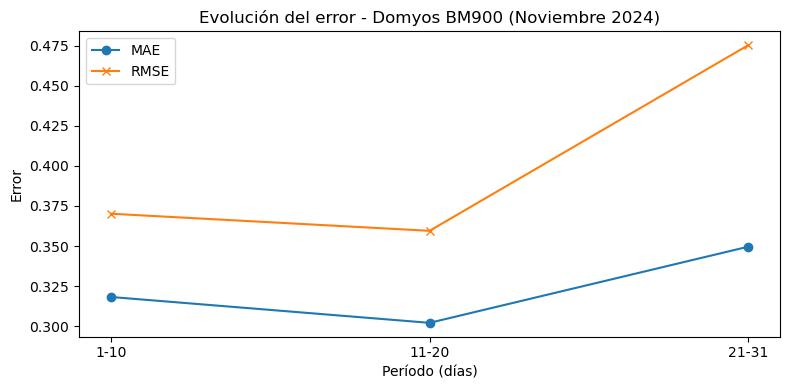

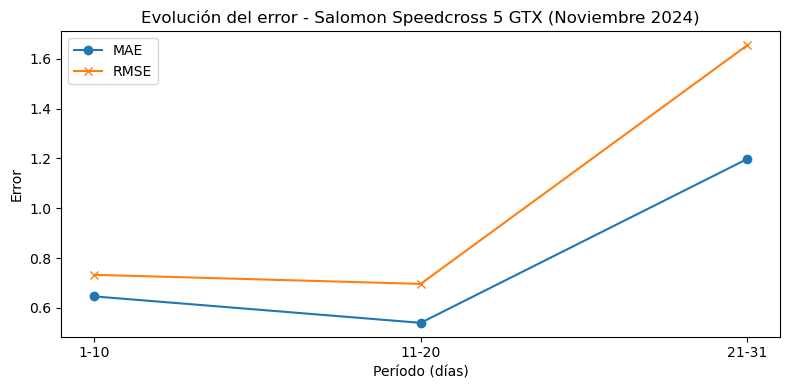

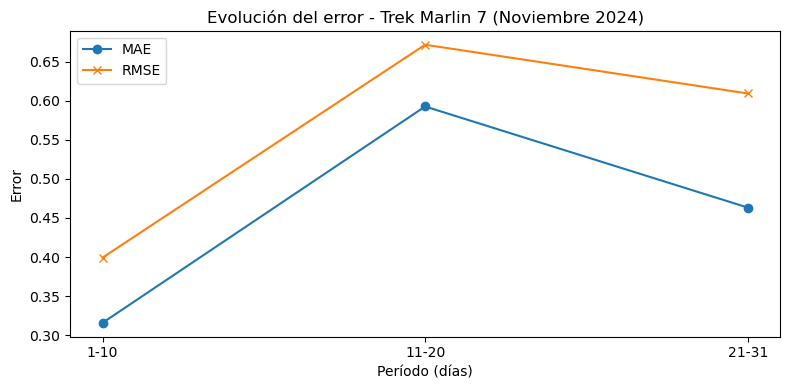

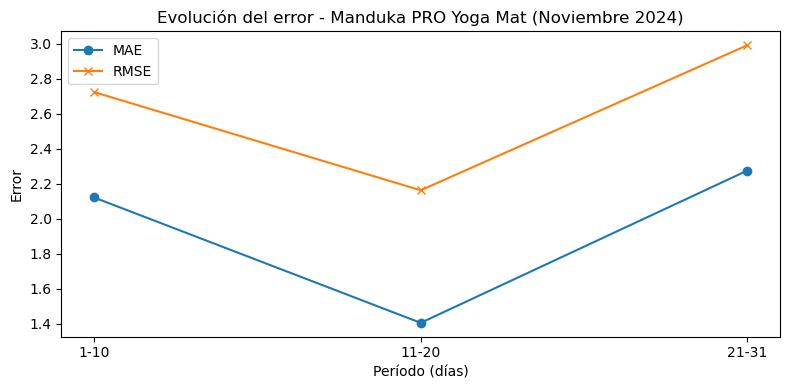

In [109]:
# 🤖 Análisis de degradación del error en noviembre 2024 por períodos de 10 días
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt

# Asegurar que 'dia_mes' es entero
nov_2024['dia_mes'] = nov_2024['dia_mes'].astype(int)

# Definir los 3 períodos de 10 días (ajustando el último para incluir hasta el final del mes)
periodos = [(1,10), (11,20), (21,31)]
periodos_labels = ['1-10', '11-20', '21-31']

resultados = []
for producto in productos_estrella:
    df_prod = nov_2024[nov_2024['nombre'] == producto].copy()
    for i, (inicio, fin) in enumerate(periodos):
        df_periodo = df_prod[(df_prod['dia_mes'] >= inicio) & (df_prod['dia_mes'] <= fin)]
        if len(df_periodo) == 0:
            resultados.append({'producto': producto, 'periodo': periodos_labels[i], 'MAE': np.nan, 'RMSE': np.nan})
            continue
        X_periodo = df_periodo[predictoras]
        y_real = df_periodo['unidades_vendidas']
        y_pred = model.predict(X_periodo)
        mae = mean_absolute_error(y_real, y_pred)
        rmse = root_mean_squared_error(y_real, y_pred)
        resultados.append({'producto': producto, 'periodo': periodos_labels[i], 'MAE': mae, 'RMSE': rmse})

# Convertir resultados a DataFrame
errores_df = pd.DataFrame(resultados)
print('Errores por producto y período:')
display(errores_df)

# Graficar evolución de MAE y RMSE para cada producto
for producto in productos_estrella:
    df_plot = errores_df[errores_df['producto'] == producto]
    plt.figure(figsize=(8,4))
    plt.plot(df_plot['periodo'], df_plot['MAE'], marker='o', label='MAE')
    plt.plot(df_plot['periodo'], df_plot['RMSE'], marker='x', label='RMSE')
    plt.title(f'Evolución del error - {producto} (Noviembre 2024)')
    plt.xlabel('Período (días)')
    plt.ylabel('Error')
    plt.legend()
    plt.tight_layout()
    plt.show()

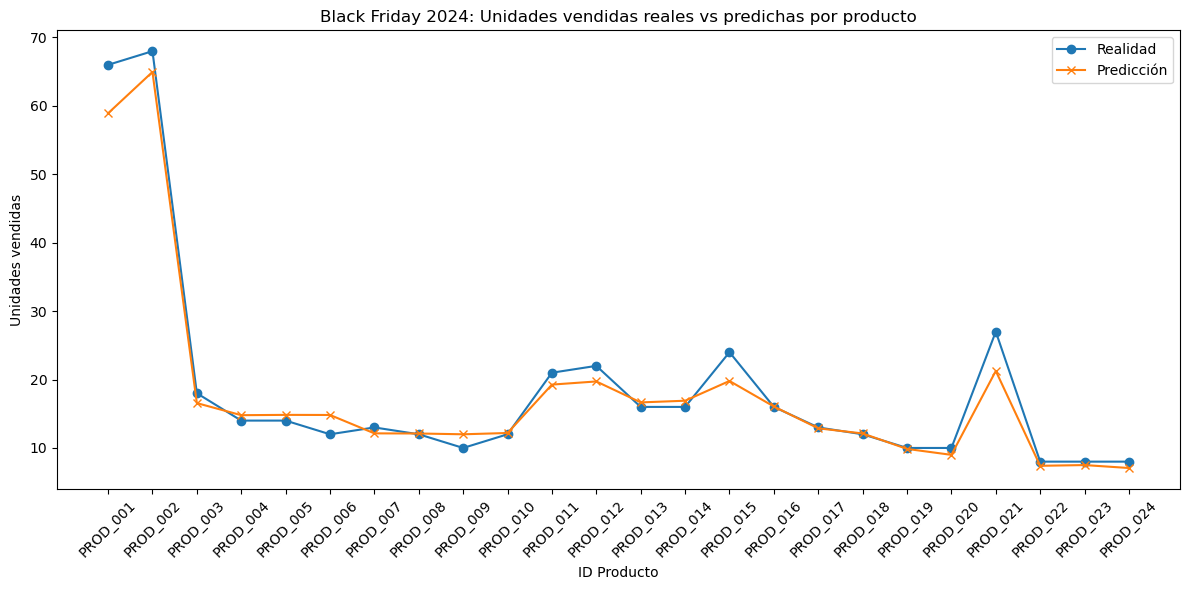

In [110]:
# 🤖 Análisis específico de Black Friday 2024: Real vs Predicho por producto_id
bf_2024 = validation_df[(validation_df['año'] == 2024) & (validation_df['es_black_friday'])]
if bf_2024.empty:
    print('No hay registros para Black Friday 2024 en el dataframe de validación.')
else:
    X_bf = bf_2024[predictoras]
    y_real_bf = bf_2024['unidades_vendidas']
    y_pred_bf = model.predict(X_bf)
    plt.figure(figsize=(12,6))
    plt.plot(bf_2024['producto_id'], y_real_bf, label='Realidad', marker='o')
    plt.plot(bf_2024['producto_id'], y_pred_bf, label='Predicción', marker='x')
    plt.title('Black Friday 2024: Unidades vendidas reales vs predichas por producto')
    plt.xlabel('ID Producto')
    plt.ylabel('Unidades vendidas')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [111]:
# 🤖 Reentrenar modelo final con todo el histórico (2021-2024)
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import numpy as np

# Usar el df completo para entrenamiento
X_full = df[predictoras]
y_full = df['unidades_vendidas']

# Parámetros óptimos usados antes
modelo_final = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=400,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)
modelo_final.fit(X_full, y_full)

print('Modelo final entrenado con todo el histórico (2021-2024).')

Modelo final entrenado con todo el histórico (2021-2024).


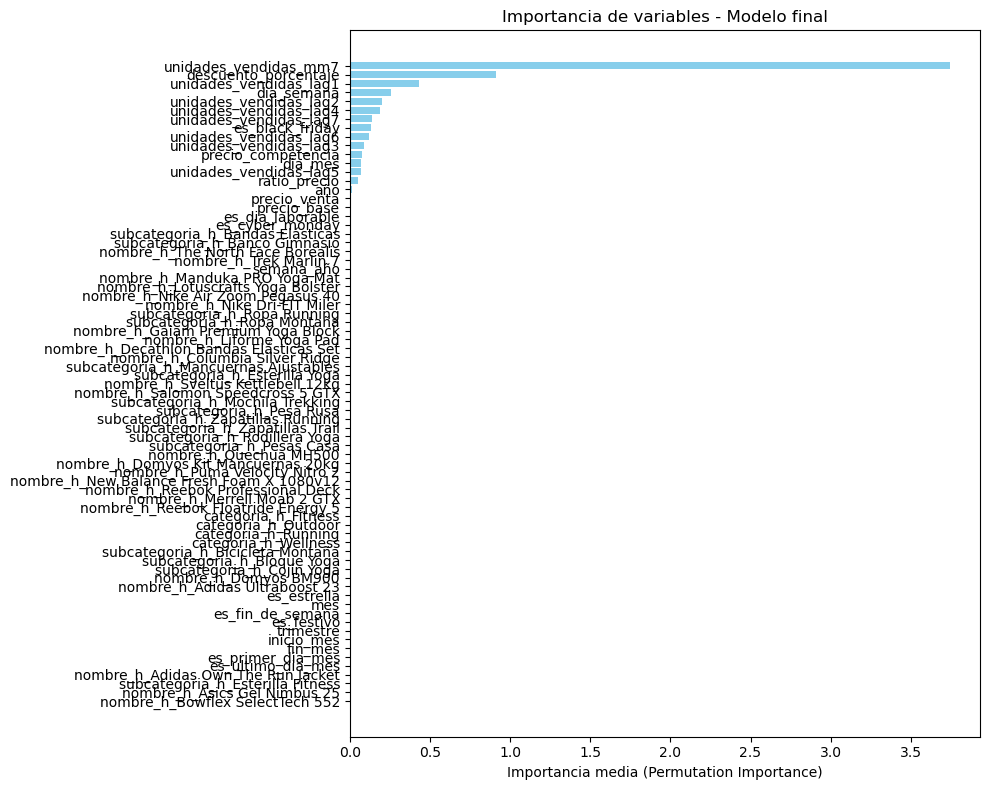

Modelo final guardado en models/modelo_final.joblib


In [113]:
# 🤖 Importancia de variables con permutation importance y guardado del modelo final
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

# Calcular permutation importance
result = permutation_importance(modelo_final, X_full, y_full, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importancias = result.importances_mean
indices = np.argsort(importancias)[::-1]

# Validar que los índices no excedan el tamaño de predictoras
variables_ordenadas = [predictoras[i] for i in indices if i < len(predictoras)]

# Gráfico de barras horizontales
plt.figure(figsize=(10,8))
plt.barh(variables_ordenadas, importancias[indices[:len(variables_ordenadas)]], color='skyblue')
plt.xlabel('Importancia media (Permutation Importance)')
plt.title('Importancia de variables - Modelo final')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Guardar el modelo final
joblib.dump(modelo_final, '../models/modelo_final.joblib')
print('Modelo final guardado en models/modelo_final.joblib')